--No graphics will be displayed.



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Jan  9 2025 17:16:28

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

Ca_HVA: gbar_Ca_HVA_somatic = 374.0 uS/cm^2, e_Ca_HVA = 132.4579341637009 mV
Ca_HVA: gbar_Ca_HVA_axonal = 306.0 uS/cm^2, e_Ca_HVA = 132.4579341637009 mV
Ca_HVA: gbar_Ca_HVA_basal = None uS/cm^2, e_Ca_HVA = 132.4579341637009 mV
Ca_HVA: gbar_Ca_HVA_apical = None uS/cm^2, e_Ca_HVA = 132.4579341637009 mV
Ca_LVAst: gbar_Ca_LVAst_somatic = 778.0 uS/cm^2, e_Ca_LVAst = 132.4579341637009 mV
Ca_LVAst: gbar_Ca_LVAst_axonal = 50.0 uS/cm^2, e_Ca_LVAst = 132.4579341637009 mV
Ca_LVAst: gbar_Ca_LVAst_basal = None uS/cm^2, e_Ca_LVAst = 132.4579341637009 mV
Ca_LVAst: gbar_Ca_LVAst_apical = None uS/cm^2, e_Ca_LVAst = 132.4579341637009 mV
Ih: gbar_Ih_somatic = 80.0 uS/cm^2, e_Ih = 

/home/berling/reduce_opto_response/article_figures/article_plot_functions.py:33: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/berling/reduce_opto_response/article_figures/article_plot_functions.py:34: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/berling/reduce_opto_response/article_figures/article_plot_functions.py:33: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

APCmax:  10
APCmax:  9
APCmax:  9


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


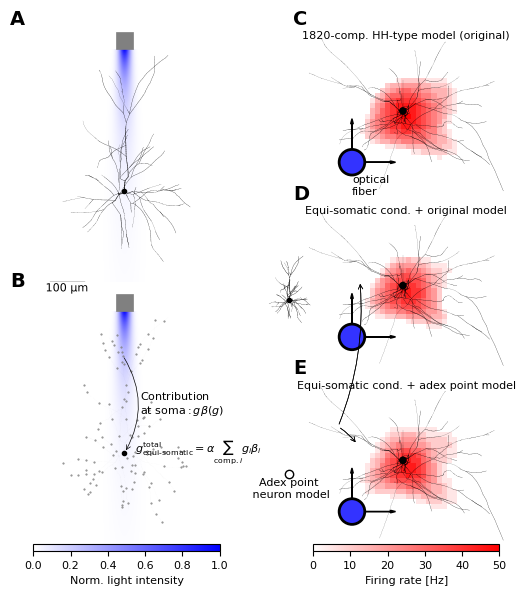

In [1]:
import os
os.chdir('/home/berling/reduce_opto_response/')
from neurostim.analysis import quick_sim_setup
import numpy as np
import pandas as pd
from neuron import h
from article_figures.article_plot_functions import plot_morphology_with_light, spatial_activation_plot, map_patt_id_2_xy, label_subplots_ABC
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import matplotlib as mpl
mpl.rc("font", size=8)

# Define cell and stimulator
simcontrol = quick_sim_setup(
    cell_dict = dict(
        cellmodel="L23_PC_cADpyr229_1",
        ChR_soma_density=13e9,
        ChR_distribution='uniform'),
    stimulator_dict = dict(
        diameter_um=50,
        NA=0.1),
)
node_data_fpath = 'snake_workflow/simulated_data/RON/L23_PC_cADpyr229_1-cluster_50-cond_scl_0.15-_node_data.npy'
# calculate light profile
soma_depth = 423.3559875488281 # copy from printed info at cell initialization
n=2000
xs = np.linspace(-300,300, n)
zs = np.linspace(0,-800, n)
xx, zz = np.meshgrid(xs, zs)
I = simcontrol.stimulator.calculate_Tx_at_pos(pos_xyz_um=[xx,np.zeros(xx.shape),zz], stim_xyz_um=[0,0,0])
I = I/np.max(I)
n_secs_cell1 = len([seg for sec in simcontrol.cell.sections for seg in sec])

# load pre-simulated spatial activation maps
df = pd.read_csv('snake_workflow/result--L23_PC_cADpyr229_1_d50_NA01.csv', index_col='Unnamed: 0')
df_full = df.loc[(df.simtype=='full')]
df_RON_full = df.loc[(df.simtype=='RON_full')]
df_RON_adex = df.loc[(df.simtype=='RON_adex')]
# map x,y coordinates on light pattern ids
df_full = map_patt_id_2_xy(df=df_full, xy_max=110, dxy=10, rotate=False)
df_RON_full = map_patt_id_2_xy(df=df_RON_full, xy_max=110, dxy=10, rotate=True)
df_RON_adex = map_patt_id_2_xy(df=df_RON_adex, xy_max=110, dxy=10, rotate=True)

############### Plotting
# figure format
a4_w = 8.27
a4_l = 11.7

fig = plt.figure(figsize=(a4_w*0.8, a4_w*0.8))
gs = gridspec.GridSpec(6, 2, width_ratios=[1, 1],figure=fig)

ax0 = fig.add_subplot(gs[ :3,0]) # A
ax1 = fig.add_subplot(gs[3: ,0]) # B
ax5 = fig.add_subplot(gs[ :2,1]) # C 
ax6 = fig.add_subplot(gs[2:4,1]) # D 
ax7 = fig.add_subplot(gs[4: ,1]) # E 
ax3 = fig.add_axes([ax6.get_position().x0-ax6.get_position().width*0.25, 
                    ax6.get_position().y0 + ax6.get_position().height*0.25,
                    ax6.get_position().width*0.5, 
                    ax6.get_position().height*0.5]) # HH illsutration in D
ax4 = fig.add_axes([ax7.get_position().x0-ax7.get_position().width*0.25, 
                    ax7.get_position().y0 + ax7.get_position().height*0.25,
                    ax7.get_position().width*0.5, 
                    ax7.get_position().height*0.5])  # adex illustration  in E


# full morphology
ax0, light_prof_mappable = plot_morphology_with_light(
    ax=ax0, 
    simtree=simcontrol.cell.sim_tree, 
    marklocs=[{'node': 1, 'x': 0.50 }], 
    locargs=[dict(marker='.', mec='black', mfc='black')],
    morph_lw=0.5,
    light_prof_xx_zz_I=[xx,zz+soma_depth,I], 
    inset=False,
    sb_width=1
)
#add fiber illustration:
rect = patches.Rectangle((-25, soma_depth), 50, 50, linewidth=0.5, edgecolor='gray', facecolor='gray', transform=ax0.transData)
fig.add_artist(rect)
# reduced morphology
ax1, light_prof_mappable = plot_morphology_with_light(
    ax=ax1, 
    simtree=simcontrol.cell.sim_tree, 
    marklocs=[{'node': 1, 'x': 0.50 }], 
    locargs=[dict(marker='.', mec='black', mfc='black')],
    morph_lw=0.01,
    light_prof_xx_zz_I=[xx,zz+soma_depth,I], 
    inset=False,
    sb_draw=False,
    cax=fig.add_axes([
        ax1.get_position().x0+ax1.get_position().width*0.1,
        0.1,
        ax1.get_position().width*0.8,
        0.01
    ]),
    cbar_kws=dict(label='Norm. light intensity', orientation='horizontal')
)
#add fiber illustration:
rect = patches.Rectangle((-25, soma_depth), 50, 50, linewidth=0.5, edgecolor='gray', facecolor='gray', transform=ax1.transData)
fig.add_artist(rect)
xyz_nodes = np.load(node_data_fpath)[0]
n_nodes_cell1 = len(xyz_nodes)
ax1.plot(xyz_nodes[:,0], xyz_nodes[:,2], c='gray', ls='', marker='.', markersize=1, label='reduced')
# add arrow
start = (xyz_nodes[100,0], xyz_nodes[100,2])
end = (0, 0)
ax1.annotate("", xy=end, xytext=start,
            arrowprops=dict(
                arrowstyle="->", linewidth=0.5, color='black',
                connectionstyle="arc3,rad=-0.3")
)
eq1 = r"$\mathrm{Contribution}$" + "\n"+r"$\mathrm{at\text{ }soma:} g \beta(g)$"
ax1.text(start[0]+50, start[1]/2, eq1, fontsize=8, ha='left', va='center')
eq2 = r"$g^{\mathrm{total}}_{\mathrm{equi\text{-}somatic}} = \alpha \sum_{\mathrm{comp.} i} g_i \beta_i$"
ax1.text(end[0]+30, end[1], eq2, fontsize=8, ha='left', va='center')
# add full neuron
simcontrol.cell.sim_tree.plot2DMorphology(
        ax=ax3,
        plotargs={'c': 'k', 'lw': 0.5, 'alpha':1},
        marklocs=[{'node': 1, 'x': 0.50 }], 
        locargs=[dict(marker='.', mec='black', mfc='black')],
        draw_soma_circle=False,
        sb_width=1,
        sb_draw=False
    )

# add adex neuron by drawing soma only
simcontrol.cell.sim_tree.plot2DMorphology(
        ax=ax4,
        plotargs={'c': 'k', 'lw': 0.0, 'alpha':1},
        marklocs=[{'node': 1, 'x': 0.50 }], 
        locargs=[dict(marker='o', mec='black', mfc='none')],
        draw_soma_circle=False,
        sb_width=1,
        sb_draw=False
    )

# rotate cell to get topview simtree:
for node in simcontrol.cell.sim_tree:
        x, y, z = node.xyz
        node.xyz = [x, -1*z, y]
# spatial profiles
APCmax=10
power_mW = 0.0004
ax5, activation_mappable = spatial_activation_plot(
    ax=ax5,
    df=df_full.loc[df_full.norm_power_mW_of_MultiStimulator==power_mW],
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=0,
    label_fiber=True
)
ax6, activation_mappable = spatial_activation_plot(
    ax=ax6,
    df=df_RON_full.loc[df_RON_full.norm_power_mW_of_MultiStimulator==power_mW],
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=0,
    label_fiber=False
)
ax7, activation_mappable = spatial_activation_plot(
    ax=ax7,
    df=df_RON_adex.loc[df_RON_adex.norm_power_mW_of_MultiStimulator==power_mW],
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=0,
    label_fiber=False
)
# Define titles
ax5.set_title(str(n_secs_cell1)+"-comp. HH-type model (original)", fontsize=8, y=0.92)
ax6.set_title("Equi-somatic cond. + original model", fontsize=8, y=0.92)
ax7.set_title("Equi-somatic cond. + adex point model", fontsize=8, y=0.92)
for ax in [ax3,ax4]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

ax4.text(0,-30, "Adex point\n neuron model", ha='center', va='top', fontsize = 8)

label_subplots_ABC(fig, axs=[ax0, ax1], x_shift=0, y_shift=0.015, fontsize=14, weight='bold')
label_subplots_ABC(fig, axs=[ax5, ax6, ax7], x_shift=0.005, y_shift=0.015, label_shift=2, fontsize=14, weight='bold')

cax = fig.add_axes([
    ax7.get_position().x0+ax7.get_position().width*0.1,
    0.1,
    ax7.get_position().width*0.8,
    0.01
])
cbar = plt.colorbar(activation_mappable, cax=cax, label='Firing rate [Hz]', orientation='horizontal')
ticks = [0, APCmax/5, APCmax*2/5, APCmax*3/5, APCmax*4/5, APCmax]
ticklabels = [ str(int(np.round(tick/0.2,0))) for tick in ticks ]
cbar.set_ticks(ticks, labels=ticklabels) 

ax3.set_facecolor('none') 
ax4.set_facecolor('none') 

# draw arrows from equi-somatic sum eq to full neuron model and adex model
# Convert data coordinates to figure coordinates
# and figure coordinates to figure fraction (0 to 1)
# start_fig =   (0.511-0.111, 0.256-0.03) 
# end_fig_ax3 = (0.544-0.11, 0.476-0.03)
# end_fig_ax4 = (0.550-0.11, 0.219-0.03)
start_fig =   (0.511, 0.256) 
end_fig_ax3 = (0.544, 0.476)
end_fig_ax4 = (0.550, 0.219)
# Draw the arrow using figure coordinates
fig.add_artist(plt.annotate("", xy=end_fig_ax3, xytext=start_fig,
                            arrowprops=dict(arrowstyle="->", linewidth=0.5, color='black',
                                            connectionstyle="arc3,rad=0.12"),
                            xycoords="figure fraction", textcoords="figure fraction"))
end_fig_ax4 = (end_fig_ax4[0]-0.01, end_fig_ax4[1]+0.01)
fig.add_artist(plt.annotate("", xy=end_fig_ax4, xytext=start_fig,
                            arrowprops=dict(arrowstyle="->", linewidth=0.5, color='black',
                                            connectionstyle="arc3,rad=-0.1"),
                            xycoords="figure fraction", textcoords="figure fraction"))


fig.savefig('article_figures/figures/article_figure2.png', dpi=300)